# OptDigits

Datasets available at <br>
archive.ics.uci.edu/ml/machine-learning-databases/optdigits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.svm import SVC

In [4]:
X_train = pd.read_csv('optdigits.tra',header=None) 
X_test  = pd.read_csv('optdigits.tes',header=None)

In [5]:
# target variable in column 64 

In [6]:
y_train = X_train[64]
y_test  = X_test[64]

In [7]:
X_train = X_train.drop(X_train.columns[64],axis=1)
X_test  = X_test.drop(X_test.columns[64],axis=1)

In [8]:
X_train.shape

(3823, 64)

In [9]:
X_test.shape

(1797, 64)

In [10]:
# y variable identifies the digit

In [11]:
list(y_train[:9])

[0, 0, 7, 4, 6, 2, 5, 5, 0]

In [12]:
# see digit in row 4

In [13]:
y_train[4]

6

In [14]:
X_train.values[4]

array([ 0,  0,  5, 14,  4,  0,  0,  0,  0,  0, 13,  8,  0,  0,  0,  0,  0,
        3, 14,  4,  0,  0,  0,  0,  0,  6, 16, 14,  9,  2,  0,  0,  0,  4,
       16,  3,  4, 11,  2,  0,  0,  0, 14,  3,  0,  4, 11,  0,  0,  0, 10,
        8,  4, 11, 12,  0,  0,  0,  4, 12, 14,  7,  0,  0])

In [15]:
X_train.values[4].shape

(64,)

In [16]:
pixels = X_train.values[4].reshape(8,8)
pixels

array([[ 0,  0,  5, 14,  4,  0,  0,  0],
       [ 0,  0, 13,  8,  0,  0,  0,  0],
       [ 0,  3, 14,  4,  0,  0,  0,  0],
       [ 0,  6, 16, 14,  9,  2,  0,  0],
       [ 0,  4, 16,  3,  4, 11,  2,  0],
       [ 0,  0, 14,  3,  0,  4, 11,  0],
       [ 0,  0, 10,  8,  4, 11, 12,  0],
       [ 0,  0,  4, 12, 14,  7,  0,  0]])

In [17]:
# 0 is a black pixel, 16 is white

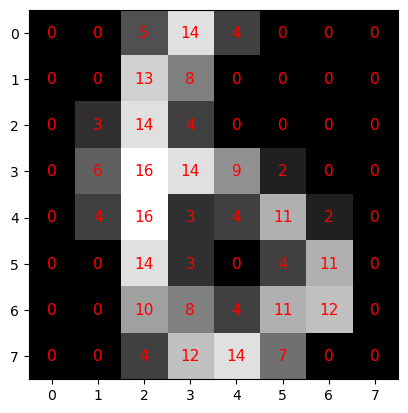

In [18]:
plt.imshow(pixels,cmap='gray')
# add red label on each pixel
for i in range(8):
    for j in range(8):
        text = plt.text(j, i, pixels[i,j], 
                        ha="center", 
                        va="center", 
                        color="r",
                        fontsize = 11)

In [19]:
# see first 9 digits in the train set

In [20]:
list(y_train[:9])

[0, 0, 7, 4, 6, 2, 5, 5, 0]

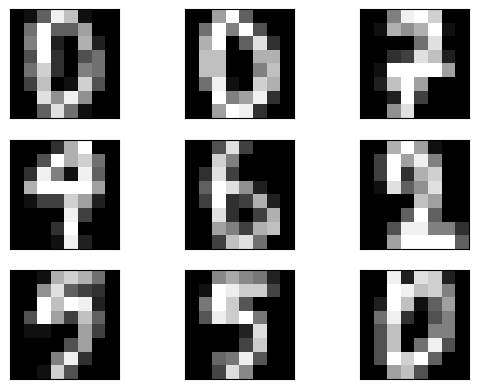

In [21]:
for k in range(0,9):
    image = X_train.values[k].reshape(8,8)    
    ax = plt.subplot(3,3,k+1)
    ax.imshow(image,cmap='gray')
    plt.setp(ax,xticks=[], yticks=[])

In [22]:
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train);

In [23]:
# test accuracy rate
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

0.9610461880912632

In [24]:
df1 = pd.crosstab(y_test,ypred,
                  rownames=['true labels'],
                  colnames=['predictions'])
df1

predictions,0,1,2,3,4,5,6,7,8,9
true labels,,,,,,,,,,
0,177,0,0,0,0,1,0,0,0,0
1,0,178,0,0,0,0,3,0,1,0
2,0,7,170,0,0,0,0,0,0,0
3,1,0,5,171,0,2,0,2,1,1
4,0,0,0,0,180,0,0,0,1,0
5,0,0,1,0,0,180,0,0,0,1
6,0,0,0,0,1,0,179,0,1,0
7,0,0,0,0,1,7,0,165,0,6
8,0,9,1,5,0,2,0,0,157,0


In [25]:
df2 = df1.copy()
df2['row sum'] = df2.sum(axis=1).values
df2

predictions,0,1,2,3,4,5,6,7,8,9,row sum
true labels,,,,,,,,,,,
0,177,0,0,0,0,1,0,0,0,0,178
1,0,178,0,0,0,0,3,0,1,0,182
2,0,7,170,0,0,0,0,0,0,0,177
3,1,0,5,171,0,2,0,2,1,1,183
4,0,0,0,0,180,0,0,0,1,0,181
5,0,0,1,0,0,180,0,0,0,1,182
6,0,0,0,0,1,0,179,0,1,0,181
7,0,0,0,0,1,7,0,165,0,6,179
8,0,9,1,5,0,2,0,0,157,0,174


In [26]:
df2['error rate'] = 1-np.diag(df1)/np.sum(df1,axis=1)
del df2['row sum']
df2

predictions,0,1,2,3,4,5,6,7,8,9,error rate
true labels,,,,,,,,,,,
0,177,0,0,0,0,1,0,0,0,0,0.005618
1,0,178,0,0,0,0,3,0,1,0,0.021978
2,0,7,170,0,0,0,0,0,0,0,0.039548
3,1,0,5,171,0,2,0,2,1,1,0.065574
4,0,0,0,0,180,0,0,0,1,0,0.005525
5,0,0,1,0,0,180,0,0,0,1,0.010989
6,0,0,0,0,1,0,179,0,1,0,0.011050
7,0,0,0,0,1,7,0,165,0,6,0.078212
8,0,9,1,5,0,2,0,0,157,0,0.097701


In [27]:
# digit with largest error rate
df2[ df2['error rate']==df2['error rate'].max()]

predictions,0,1,2,3,4,5,6,7,8,9,error rate
true labels,,,,,,,,,,,
8,0,9,1,5,0,2,0,0,157,0,0.097701


### Find best C and gamma

In [28]:
kfold = StratifiedKFold(n_splits=5,
                        shuffle = True, 
                        random_state = 1)

In [29]:
params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma': [0.001, 0.01, 0.1, 1, 10]}

In [30]:
grid_search = GridSearchCV(SVC(), params, cv=kfold)
grid_search.fit(X_train, y_train);

In [31]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [32]:
# Validation accuracy rate
grid_search.best_score_

0.991368442665024

In [33]:
# Test accuracy rate
grid_search.score(X_test, y_test)

0.9827490261547023

### Heatmap on the GridSearchCV

In [34]:
# store the results into a Dataframe
results = pd.DataFrame(grid_search.cv_results_)
results.dtypes

mean_fit_time        float64
std_fit_time         float64
mean_score_time      float64
std_score_time       float64
param_C               object
param_gamma           object
params                object
split0_test_score    float64
split1_test_score    float64
split2_test_score    float64
split3_test_score    float64
split4_test_score    float64
mean_test_score      float64
std_test_score       float64
rank_test_score        int32
dtype: object

In [35]:
# split_train_score values are stored 
# by selecting return_train_score = True

In [36]:
# Create a dataframe with selected columns
list1 = list([4,5,12])
df9 = results.iloc[:,list1].copy()
df9

,param_C,param_gamma,mean_test_score
0,0.001,0.001,0.161125
1,0.001,0.01,0.147262
2,0.001,0.1,0.102276
3,0.001,1,0.162432
4,0.001,10,0.103322
5,0.01,0.001,0.789169
6,0.01,0.01,0.147262
7,0.01,0.1,0.102276
8,0.01,1,0.162432
9,0.01,10,0.103322


In [37]:
df9.columns = ['C','gamma','arate']
df9

,C,gamma,arate
0,0.001,0.001,0.161125
1,0.001,0.01,0.147262
2,0.001,0.1,0.102276
3,0.001,1,0.162432
4,0.001,10,0.103322
5,0.01,0.001,0.789169
6,0.01,0.01,0.147262
7,0.01,0.1,0.102276
8,0.01,1,0.162432
9,0.01,10,0.103322


In [38]:
# Show validation accuracy rates in a two-way table
df1 = df9.pivot_table('arate',columns = 'C',index = 'gamma')
df1

C,0.001,0.010,0.100,1.000,10.000
gamma,,,,,
0.001,0.161125,0.789169,0.976986,0.989277,0.991368
0.010,0.147262,0.147262,0.150925,0.831550,0.844631
0.100,0.102276,0.102276,0.102276,0.106723,0.107247
1.000,0.162432,0.162432,0.162432,0.102014,0.102014
10.000,0.103322,0.103322,0.103322,0.103322,0.103322


In [39]:
# Transform dataframe into array
arates = df1.values
arates = np.round(arates,3)
arates

array([[0.161, 0.789, 0.977, 0.989, 0.991],
       [0.147, 0.147, 0.151, 0.832, 0.845],
       [0.102, 0.102, 0.102, 0.107, 0.107],
       [0.162, 0.162, 0.162, 0.102, 0.102],
       [0.103, 0.103, 0.103, 0.103, 0.103]])

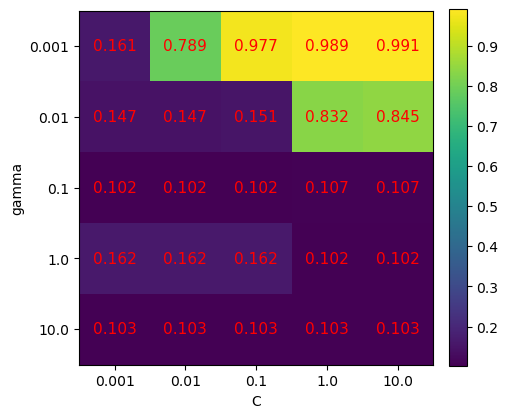

In [40]:
plt.figure(figsize = (5,5))
plt.yticks(range(5),df1.index)
plt.xticks(range(5),df1.columns)
plt.ylabel('gamma')
plt.xlabel('C')
plt.imshow(arates)
for i in range(5):
    for j in range(5):
        text = plt.text(j, i, arates[i,j], 
                        ha="center", 
                        va="center", 
                        color="r",
                        fontsize = 11)
# resize colorbar
plt.colorbar(fraction=0.046, pad=0.04);

### 2nd Search for best C and gamma

In [41]:
kfold = StratifiedKFold(n_splits=5,
                        shuffle = True, 
                        random_state = 1)

In [54]:
params = {'gamma': np.linspace(0.0005,0.001,5),
          'C': np.linspace(9,13,5)}

In [55]:
grid_search = GridSearchCV(SVC(), params, cv=kfold)
grid_search.fit(X_train, y_train);

In [56]:
grid_search.best_params_

{'C': 9.0, 'gamma': 0.00075}

In [57]:
# Validation accuracy rate
grid_search.best_score_

0.992675974403723

In [58]:
# Test accuracy rate
grid_search.score(X_test, y_test)

0.9833055091819699

In [60]:
# store the results into a Dataframe
results2 = pd.DataFrame(grid_search.cv_results_)

In [61]:
list1 = list([4,5,12])
df9 = results2.iloc[:,list1].copy()
df9.columns = ['C','gamma','arate']
df1 = df9.pivot_table('arate',columns = 'C',index = 'gamma')
df1

C,9.0,10.0,11.0,12.0,13.0
gamma,,,,,
0.000500,0.991891,0.991891,0.991891,0.991891,0.991891
0.000625,0.992153,0.992153,0.992153,0.992153,0.992153
0.000750,0.992676,0.992676,0.992676,0.992676,0.992676
0.000875,0.991892,0.991892,0.991892,0.991892,0.992153
0.001000,0.991368,0.991368,0.991630,0.991630,0.991630


In [62]:
# Transform df1 into array
arates = df1.values
arates = np.round(arates,3)

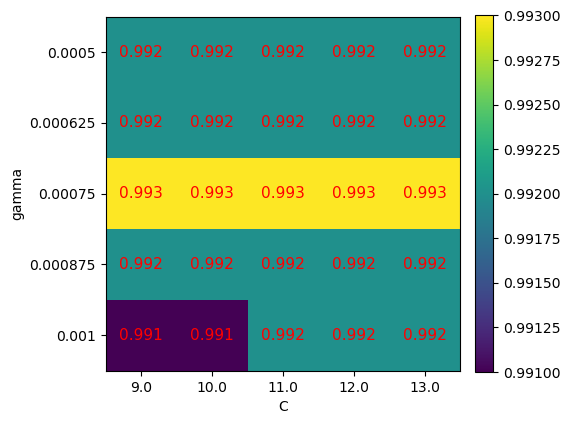

In [63]:
plt.figure(figsize = (5,5))
plt.yticks(range(5),df1.index)
plt.xticks(range(5),df1.columns)
plt.ylabel('gamma')
plt.xlabel('C')
plt.imshow(arates)
for i in range(5):
    for j in range(5):
        text = plt.text(j, i, arates[i,j], 
                        ha="center", 
                        va="center", 
                        color="r",
                        fontsize = 11)
# resize colorbar
plt.colorbar(fraction=0.046, pad=0.04);